
## 0) Setup

We'll use NumPy for quick data, Matplotlib for plots, Pillow for images, SciPy for audio utilities, and IPython's `Audio` for playback.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Quality-of-life: render plots inline and increase figure DPI
%matplotlib inline
plt.rcParams['figure.dpi'] = 120

from PIL import Image
from IPython.display import Audio, display

# For audio I/O and a simple spectrogram
from scipy.io import wavfile
from scipy.signal import spectrogram

print("Versions -> numpy:", np.__version__, "| matplotlib:", plt.matplotlib.__version__)


Versions -> numpy: 2.1.3 | matplotlib: 3.10.1



## 1) Line plot, labels, title, grid

The core pattern is:

```python
plt.figure()
plt.plot(x, y)        # your data
plt.title("...")      # title
plt.xlabel("...")     # axis labels
plt.ylabel("...")
plt.grid(True)        # light grid
plt.show()            # render
```


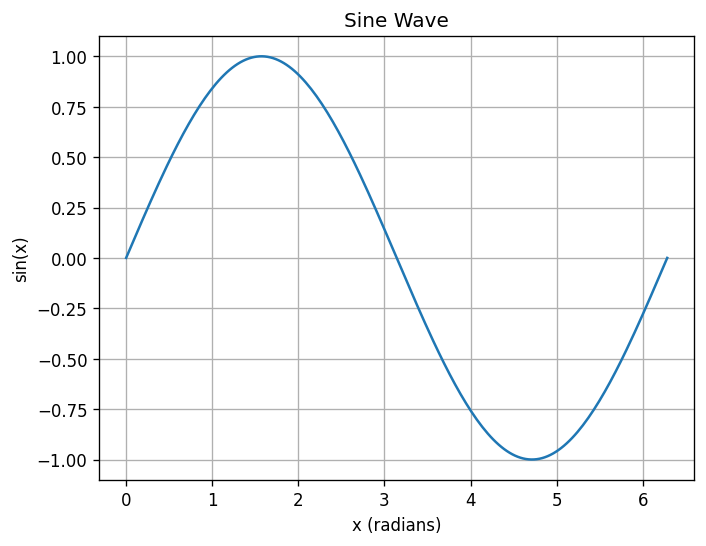

In [2]:

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x (radians)")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()



## 2) Scatter plot (great for relationships)

Use `plt.scatter` for point clouds.


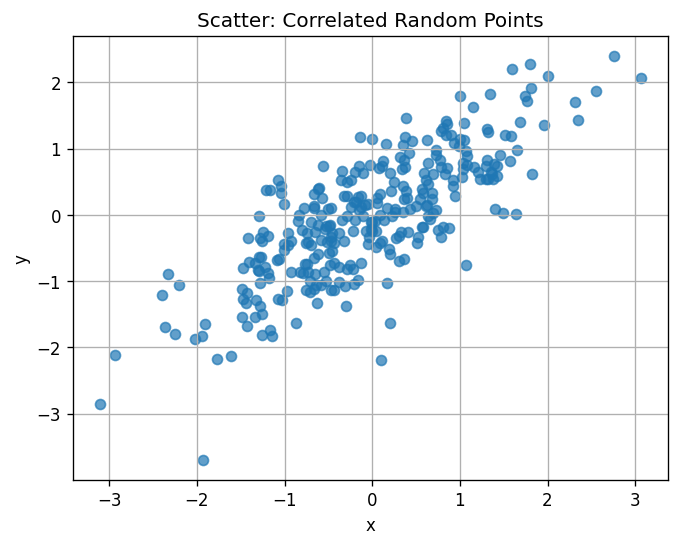

In [3]:

rng = np.random.default_rng(0)
x = rng.normal(loc=0, scale=1, size=300)
y = 0.7*x + rng.normal(0, 0.6, size=x.size)

plt.figure()
plt.scatter(x, y, alpha=0.7)
plt.title("Scatter: Correlated Random Points")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()



## 3) Bar chart (categorical data)

Bar charts are ideal for small categorical comparisons.


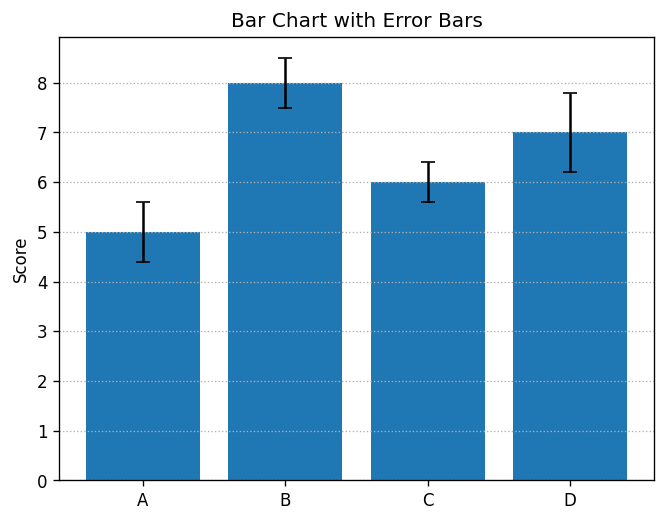

In [4]:

labels = ["A", "B", "C", "D"]
values = [5, 8, 6, 7]
errors = [0.6, 0.5, 0.4, 0.8]

x = np.arange(len(labels))

plt.figure()
plt.bar(x, values, yerr=errors, capsize=4)
plt.xticks(x, labels)
plt.title("Bar Chart with Error Bars")
plt.ylabel("Score")
plt.grid(True, axis="y", linestyle=":")
plt.show()



## 4) Histogram (distributions)

`plt.hist` shows how data is distributed. Adjust `bins` for resolution.


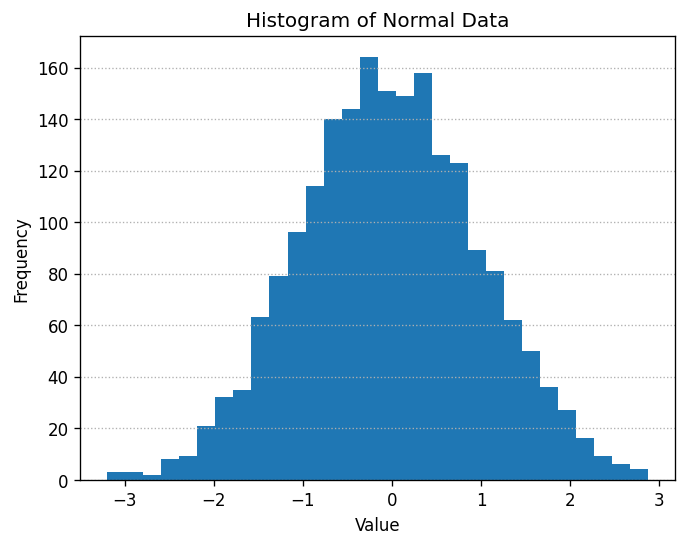

In [5]:

data = rng.normal(0, 1, size=2000)

plt.figure()
plt.hist(data, bins=30)
plt.title("Histogram of Normal Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, axis="y", linestyle=":")
plt.show()



## 5) Legends and annotations

Add context to your plots with `label=` and `plt.legend()`. Use `plt.annotate` to mark a point.


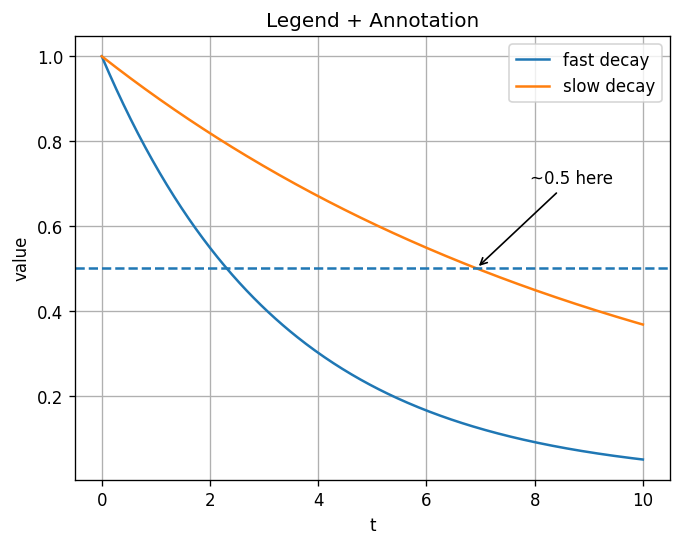

In [6]:

x = np.linspace(0, 10, 300)
y1 = np.exp(-0.3*x)
y2 = np.exp(-0.1*x)

plt.figure()
plt.plot(x, y1, label="fast decay")
plt.plot(x, y2, label="slow decay")
plt.title("Legend + Annotation")
plt.xlabel("t")
plt.ylabel("value")
plt.grid(True)
plt.legend()

# Annotate where curves cross a threshold
th = 0.5
plt.axhline(th, linestyle="--")
idx = np.argmin(np.abs(y2 - th))
plt.annotate("~0.5 here", xy=(x[idx], y2[idx]), xytext=(x[idx]+1, y2[idx]+0.2),
             arrowprops=dict(arrowstyle="->"))
plt.show()



## 6) Saving a figure

Use `plt.savefig("figure.png", bbox_inches="tight")` before `plt.show()` to save the current figure to disk.


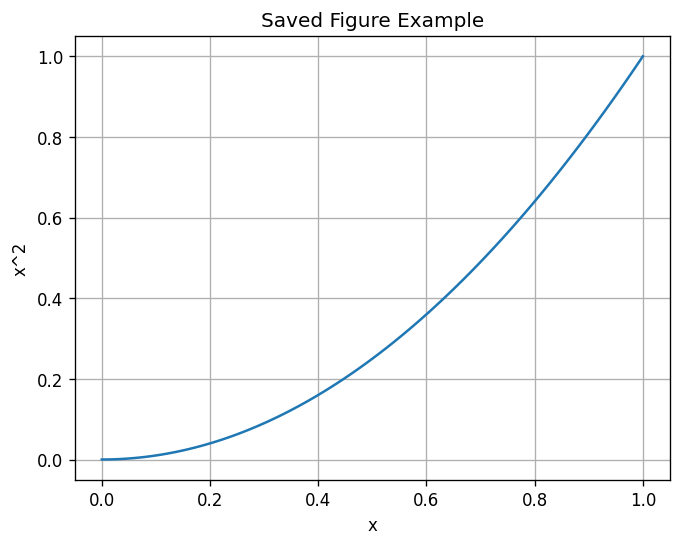

Wrote saved_figure.png to the working directory.


In [7]:

x = np.linspace(0, 1, 100)
y = x**2

plt.figure()
plt.plot(x, y)
plt.title("Saved Figure Example")
plt.xlabel("x")
plt.ylabel("x^2")
plt.grid(True)

plt.savefig("saved_figure.png", bbox_inches="tight")
plt.show()

print("Wrote saved_figure.png to the working directory.")



## 7) Load and display an **image**

Two options below:

1. **Your own file** – set `img_path` to a local image (e.g., `"path/to/photo.jpg"`).
2. **No file?** We generate a small synthetic image so you can still run the cell.


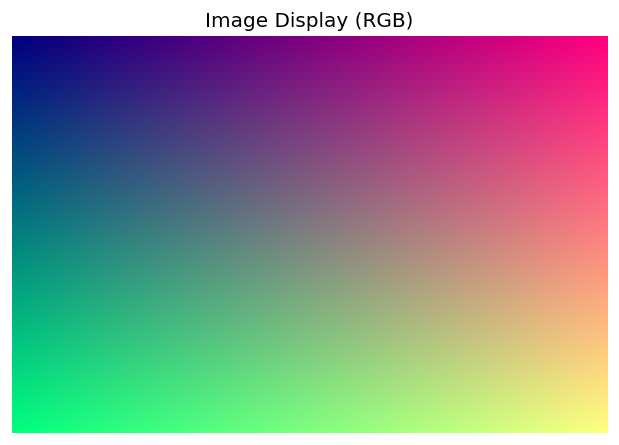

In [8]:

# 1) If you have a file, put its path here:
img_path = None  # e.g., "path/to/photo.jpg"

if img_path and os.path.exists(img_path):
    im = Image.open(img_path).convert("RGB")
else:
    # 2) Synthetic fallback: a simple gradient image (100x150)
    w, h = 150, 100
    x = np.linspace(0, 1, w)
    y = np.linspace(0, 1, h)
    xv, yv = np.meshgrid(x, y)
    arr = np.stack([xv, yv, 0.5*np.ones_like(xv)], axis=-1)  # shape (h, w, 3)
    im = Image.fromarray(np.uint8(arr*255), mode="RGB")

plt.figure()
plt.imshow(im)
plt.title("Image Display (RGB)")
plt.axis("off")  # images rarely need axes
plt.show()



## 8) Load and display **audio** (waveform + playback + spectrogram)

Again, two options:

1. **Your own WAV file** – set `audio_path` to a local `.wav` file.
2. **No file?** We generate a 2‑second tone (A4 at 440 Hz) and use that.


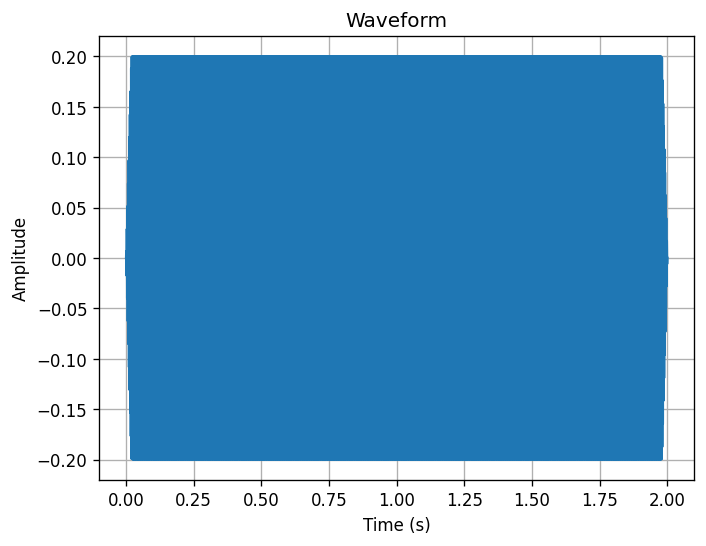

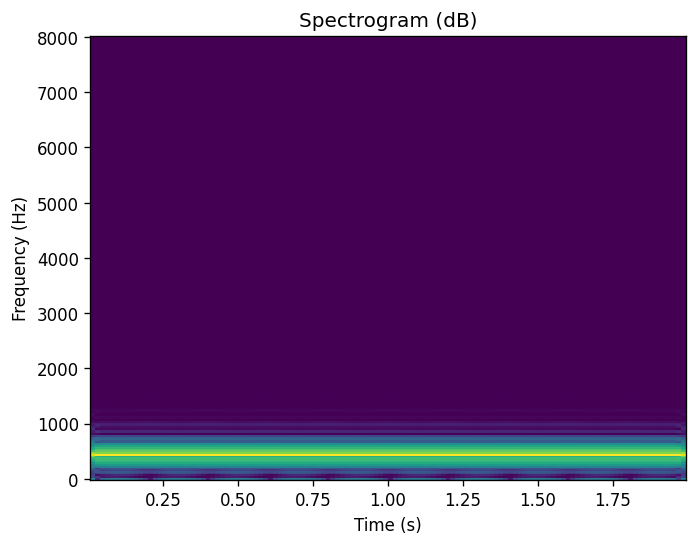

In [9]:

# 1) Your file here if you have one:
audio_path = None  # e.g., "path/to/speech.wav"

sr = 16000  # sample rate Hz

if audio_path and os.path.exists(audio_path):
    sr, audio = wavfile.read(audio_path)
    # Ensure float for consistent processing/plotting
    if audio.dtype != np.float32 and audio.dtype != np.float64:
        max_val = np.iinfo(audio.dtype).max if np.issubdtype(audio.dtype, np.integer) else 1.0
        audio = audio.astype(np.float32) / max_val
else:
    # 2) Synthetic fallback: 2 seconds of A4 (440Hz) with a short fade
    t = np.linspace(0, 2.0, int(sr*2.0), endpoint=False)
    audio = 0.2*np.sin(2*np.pi*440*t)
    # quick fade in/out
    fade_len = int(0.02*sr)
    fade_in = np.linspace(0, 1, fade_len)
    fade_out = fade_in[::-1]
    audio[:fade_len] *= fade_in
    audio[-fade_len:] *= fade_out

# (A) Waveform
plt.figure()
plt.plot(np.arange(len(audio))/sr, audio)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# (B) Quick listen (if your environment supports audio)
display(Audio(audio, rate=sr))

# (C) Spectrogram
f, t, Sxx = spectrogram(audio, fs=sr, nperseg=512, noverlap=256)
plt.figure()
plt.pcolormesh(t, f, 10*np.log10(Sxx + 1e-10), shading="auto")
plt.title("Spectrogram (dB)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
